<a href="https://colab.research.google.com/github/nitinlodhi019/Machine-Learning/blob/main/Ensemble-Learning/Bagging/Bagging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bagging

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv('/content/iris.csv')

In [ ]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
encoder = LabelEncoder()

In [ ]:
data['species'] = encoder.fit_transform(data['species'])

In [ ]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
data = data[data['species'] != 0][['sepal_width','petal_length','species']]

In [ ]:
data.head()

,sepal_width,petal_length,species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

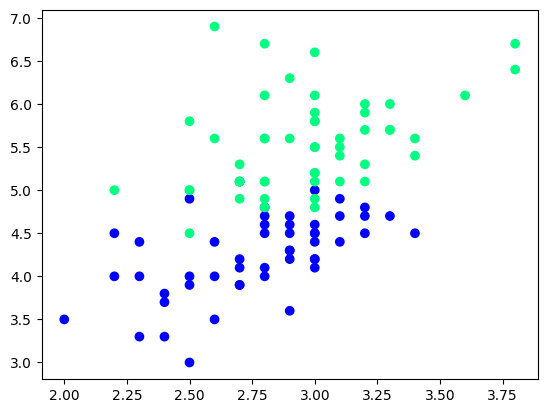

In [ ]:
plt.scatter(data['sepal_width'],data['petal_length'], c=data['species'], cmap='winter')

In [ ]:
# take only 10 rows for training
data = data.sample(100)
data_train = data.iloc[:60,].sample(10)
data_val = data.iloc[60:80,:].sample(5)
data_test = data.iloc[80:,:].sample(5)

In [ ]:
data_train

,sepal_width,petal_length,species
80,2.4,3.8,1
101,2.7,5.1,2
75,3.0,4.4,1
77,3.0,5.0,1
64,2.9,3.6,1
59,2.7,3.9,1
145,3.0,5.2,2
93,2.3,3.3,1
148,3.4,5.4,2
65,3.1,4.4,1


In [ ]:
X_test = data_val.iloc[:,0:2].values
y_test = data_val.iloc[:,-1].values

In [ ]:
X_test

array([[2.7, 4.1],
       [3. , 4.8],
       [2.8, 4.7],
       [3.6, 6.1],
       [3.2, 4.7]])

In [ ]:
y_test

array([1, 2, 1, 2, 1])

## Case 1 bagging

In [ ]:
# data for 1 tree
data_bag = data_train.sample(8, replace=True)

X = data_bag.iloc[:,0:2]
y = data_bag.iloc[:,-1]

data_bag

,sepal_width,petal_length,species
64,2.9,3.6,1
101,2.7,5.1,2
65,3.1,4.4,1
77,3.0,5.0,1
101,2.7,5.1,2
93,2.3,3.3,1
148,3.4,5.4,2
148,3.4,5.4,2


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [ ]:
dt_bag1 = DecisionTreeClassifier()

In [ ]:
def evaluate (clf, X, y):
  clf.fit(X, y)
  plot_tree(clf)
  plt.show()
  plot_decision_regions(X.values, y.values, clf=clf, legend=2)
  y_pred = clf.predict(X_test)
  print('Accuracy: ',accuracy_score(y_test, y_pred))

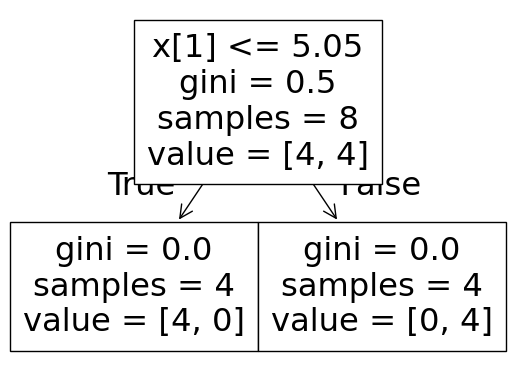

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Accuracy:  0.8


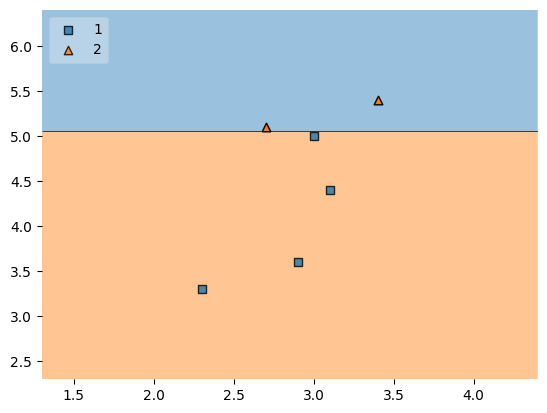

In [ ]:
evaluate(dt_bag1, X, y)

In [ ]:
# data for 2 tree
data_bag = data_train.sample(8, replace=True)

X = data_bag.iloc[:,0:2]
y = data_bag.iloc[:,-1]

data_bag

,sepal_width,petal_length,species
64,2.9,3.6,1
80,2.4,3.8,1
148,3.4,5.4,2
64,2.9,3.6,1
80,2.4,3.8,1
101,2.7,5.1,2
80,2.4,3.8,1
148,3.4,5.4,2


In [ ]:
dt_bag2 = DecisionTreeClassifier()

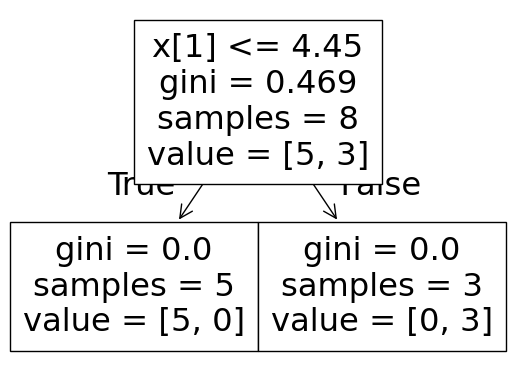

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Accuracy:  0.6


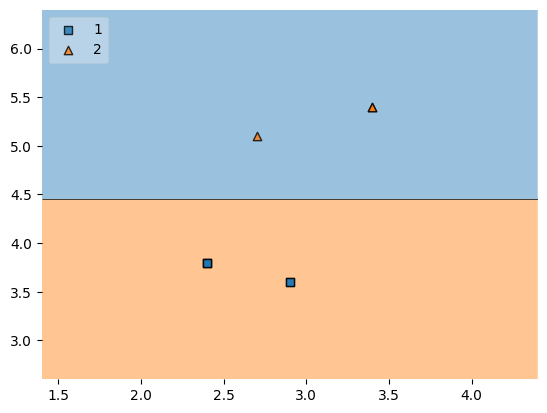

In [ ]:
evaluate(dt_bag2, X, y)

In [ ]:
# data for 3 tree
data_bag = data_train.sample(8, replace=True)

X = data_bag.iloc[:,0:2]
y = data_bag.iloc[:,-1]

data_bag

,sepal_width,petal_length,species
145,3.0,5.2,2
148,3.4,5.4,2
77,3.0,5.0,1
145,3.0,5.2,2
65,3.1,4.4,1
65,3.1,4.4,1
64,2.9,3.6,1
80,2.4,3.8,1


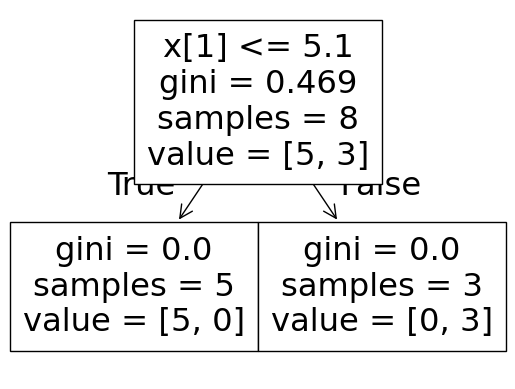

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Accuracy:  0.8


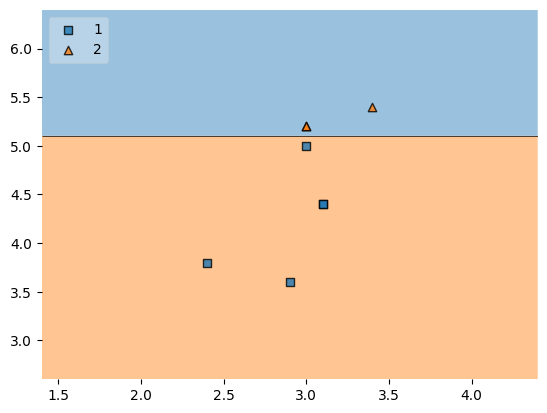

In [ ]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3, X, y)

## prediction

In [ ]:
data_test

,sepal_width,petal_length,species
133,2.8,5.1,2
98,2.5,3.0,1
53,2.3,4.0,1
91,3.0,4.6,1
63,2.9,4.7,1


In [ ]:
print('predictor1', dt_bag1.predict(np.array([2.9,4.7]).reshape(1,2)))
print('predictor2', dt_bag2.predict(np.array([2.9,4.7]).reshape(1,2)))
print('predictor3', dt_bag3.predict(np.array([2.9,4.7]).reshape(1,2)))

predictor1 [1]
predictor2 [2]
predictor3 [1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


## Pasting
row sapling without replacement

In [ ]:
data_train

,sepal_width,petal_length,species
80,2.4,3.8,1
101,2.7,5.1,2
75,3.0,4.4,1
77,3.0,5.0,1
64,2.9,3.6,1
59,2.7,3.9,1
145,3.0,5.2,2
93,2.3,3.3,1
148,3.4,5.4,2
65,3.1,4.4,1


In [ ]:
data_train.sample(8)

,sepal_width,petal_length,species
75,3.0,4.4,1
65,3.1,4.4,1
59,2.7,3.9,1
80,2.4,3.8,1
101,2.7,5.1,2
77,3.0,5.0,1
145,3.0,5.2,2
64,2.9,3.6,1


## random subspaces

# Bagging classifier

In [ ]:
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [ ]:
X, y = make_classification(n_samples = 10000, n_features=10, n_informative=3)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print('Accuracy: ',accuracy_score(y_test,y_pred))

Accuracy:  0.896


## Bagging

In [ ]:
bag = BaggingClassifier(
    estimator = DecisionTreeClassifier(),
    n_estimators = 500,  #500 tree
    max_samples = 0.25,
    bootstrap = True,   #sampling with replacemet
    random_state = 42
)

In [ ]:
bag.fit(X_train,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=0.25,
                  n_estimators=500, random_state=42)

In [ ]:
y_pred = bag.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.9265

In [ ]:
bag.estimators_samples_[0].shape

(2000,)

In [ ]:
bag.estimators_features_[0].shape

(10,)

## Bagging using SVM

In [ ]:
bag = BaggingClassifier(
    estimator = SVC(),
    n_estimators = 500,  #500 tree
    max_samples = 0.25,
    bootstrap = True,   #sampling with replacemet
    random_state = 42
)

In [ ]:
bag.fit(X_train,y_train)

BaggingClassifier(estimator=SVC(), max_samples=0.25, n_estimators=500,
                  random_state=42)

In [ ]:
y_pred = bag.predict(X_test)
accuracy_score(y_test, y_pred)

0.8925

## Pasting
sampling without replacement

In [ ]:
bag = BaggingClassifier(
    estimator = DecisionTreeClassifier(),
    n_estimators = 500,  #500 tree
    max_samples = 0.25,
    bootstrap = False,   #sampling with replacemet
    random_state = 42,
    verbose =  1,
    n_jobs = -1
)

In [ ]:
bag.fit(X_train,y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:   19.4s finished


BaggingClassifier(bootstrap=False, estimator=DecisionTreeClassifier(),
                  max_samples=0.25, n_estimators=500, n_jobs=-1,
                  random_state=42, verbose=1)

In [ ]:
y_pred = bag.predict(X_test)
accuracy_score(y_test, y_pred)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.4s finished


0.9285

## Random Subspaces
column sampling

In [ ]:
bag = BaggingClassifier(
    estimator = DecisionTreeClassifier(),
    n_estimators = 500,  #500 tree
    max_samples = 1.0,
    bootstrap = False,   #sampling with replacemet
    max_features = 0.5,
    bootstrap_features = True,
    random_state = 42
)

In [ ]:
bag.fit(X_train,y_train)

BaggingClassifier(bootstrap=False, bootstrap_features=True,
                  estimator=DecisionTreeClassifier(), max_features=0.5,
                  n_estimators=500, random_state=42)

In [ ]:
y_pred = bag.predict(X_test)
accuracy_score(y_test, y_pred)

0.9135

In [ ]:
bag.estimators_samples_[0].shape

(8000,)

In [ ]:
bag.estimators_features_[0].shape

(5,)

## Random Patches
column and row sampling

In [ ]:
bag = BaggingClassifier(
    estimator = DecisionTreeClassifier(),
    n_estimators = 500,  #500 tree
    max_samples = 0.25,
    bootstrap = True,   #sampling with replacemet
    max_features = 0.5,
    bootstrap_features = True,
    random_state = 42
)

In [ ]:
bag.fit(X_train,y_train)

BaggingClassifier(bootstrap_features=True, estimator=DecisionTreeClassifier(),
                  max_features=0.5, max_samples=0.25, n_estimators=500,
                  random_state=42)

In [ ]:
y_pred = bag.predict(X_test)
accuracy_score(y_test, y_pred)

0.9095

In [ ]:
bag.estimators_samples_[0].shape

(2000,)

In [ ]:
bag.estimators_features_[0].shape

(5,)

## OOB Score
It provides an estimate of the out-of-bag (OOB) error of the model, which is the average prediction error of each test sample that is not used in the training of the corresponding decision tree.

OOB score is calculated by using only the decision trees that did not see the example during training. The OOB score is the number of correctly predicted rows from the out of bag sample.


In [ ]:
bag = BaggingClassifier(
    estimator = DecisionTreeClassifier(),
    n_estimators = 500,  #500 tree
    max_samples = 0.25,
    bootstrap = True,   #sampling with replacemet
    oob_score = True,
    random_state = 42
)

In [ ]:
bag.fit(X_train,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=0.25,
                  n_estimators=500, oob_score=True, random_state=42)

In [ ]:
bag.oob_score_

0.928625

In [ ]:
y_pred = bag.predict(X_test)
accuracy_score(y_test, y_pred)

0.9265

## Applying GridSearchCV
 GridSearchCV is a technique for finding the optimal parameter values from a given set of parameters in a grid.

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters = {
    'n_estimators' : [50,100,500],
    'max_samples' : [0.1,0.4,0.7,1.0],
    'bootstrap' : [True, False],
    'max_features' : [0.1, 0.4, 0.7, 1.0],
    'bootstrap_features' : [True, False]
    }

In [ ]:
search = GridSearchCV(BaggingClassifier(n_jobs=-1), parameters, cv=5, n_jobs=-1)

In [ ]:
search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


KeyboardInterrupt: 

In [ ]:
search.best_params_

In [ ]:
search.best_score_

# Bagging Regressor

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('/content/BostonHousing.csv')

In [ ]:
data.shape

In [ ]:
X = data.iloc[:,0:13]
y = data.iloc[:,-1]

In [ ]:
print(X.shape)
print(y.shape)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.20)

In [ ]:
print(X_test.shape)
print(X_train.shape)
print(y_test.shape)
print(y_train.shape)

In [ ]:
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor()

In [ ]:
lr.fit(X_train, y_train)
knn.fit(X_train, y_train)
dt.fit(X_train, y_train)

In [ ]:
y_pred1 = lr.predict(X_test)
y_pred2 = knn.predict(X_test)
y_pred3 = dt.predict(X_test)

In [ ]:
from sklearn.ensemble import BaggingRegressor
bag_regressor = BaggingRegressor(random_state=1)
bag_regressor.fit(X_train, y_train)

In [ ]:
y_preds = bag_regressor.predict(X_test)

print('Training Coefficient of r2 score: %.3f' %bag_regressor.score(X_train, y_train))
print('testing Coefficient of r2 score: %.3f' %bag_regressor.score(X_test, y_test))

In [ ]:
params = {
    'base_estimator' : [None, LinearRegression(), KNeighborsRegressor()],
    'n_estimators' : [20,50, 100],
    'max_samples' : [0.5, 1.0],
    'bootstrap' : [True, False],
    'max_features' : [0.5, 1.0],
    'bootstrap_features' : [True, False]
}

In [ ]:
bagging_regressor_grid = GridSearchCV(BaggingRegressor(random_state=1, n_jobs=-1), param_grid=params, cv=3, n_jobs=-1)
bagging_regressor_grid.fit(X_train, y_train)

In [ ]:
print("train r2 score : %.3f" %bagging_regressor_grid.best_estimator_.score(X_train, y_train))
print("test r2 score : %.3f" %bagging_regressor_grid.best_estimator_.score(X_test, y_test))
print('Best r2 score through GridSearch : %.3f' %bagging_regressor_grid.best_score_)
print('Best Parameters using GridSearch : ',bagging_regressor_grid.best_params_)